In [1]:
ls ../data

MNIST/           ml-latest-small/


In [2]:
ls ../data/ml-latest-small

README.txt   links.csv    movies.csv   ratings.csv  tags.csv


In [3]:
import pandas as pd
import numpy as np


In [4]:
links = pd.read_csv('../data/ml-latest-small/links.csv')
movies = pd.read_csv('../data/ml-latest-small/movies.csv')
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
tags = pd.read_csv('../data/ml-latest-small/tags.csv')

In [38]:
data=pd.pivot_table(ratings,values='rating',index='userId',columns='movieId')
print(data.shape)

(610, 9724)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [297]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [31]:
data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data_1=data.T[(data.notna().sum()>100)].T

In [68]:
data_2=data_1[data_1.T.notna().sum()>20]

In [70]:
D=data_2.fillna(3)

In [71]:
D

movieId,1,2,6,10,32,34,39,47,50,110,...,7153,7361,7438,8961,33794,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,3.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
6,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
7,4.5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.5,3.0,...,4.0,3.0,3.0,4.0,2.0,1.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.5,3.5,...,4.5,4.0,4.5,4.0,3.0,3.5,3.0,4.0,3.0,3.0
607,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
608,2.5,2.0,3.0,4.0,3.5,3.5,3.0,4.5,4.5,4.0,...,4.0,4.5,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0


In [72]:
from sklearn.decomposition import NMF

In [282]:
model = NMF(n_components=10)

In [283]:
model.fit(D.values)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [284]:
T = model.components_

In [285]:
T[:,0]

array([0.75001389, 1.07710367, 0.36036936, 0.47772374, 0.42015787,
       1.14552033, 0.27777308, 1.44686276, 0.58830291, 1.98406365])

In [286]:
T.shape

(10, 134)

In [287]:
W = model.fit_transform(D.values)

In [288]:
W.shape

(352, 10)

In [87]:
np.linalg.norm(np.dot(W,T)-D.values)

111.78808491521994

In [88]:
from sklearn.neighbors import NearestNeighbors

In [91]:
nbrs = NearestNeighbors(n_neighbors=5).fit(T.transpose())

In [92]:
distances, indices = nbrs.kneighbors(T.transpose())

In [93]:
indices

array([[  0,  45,  31,  50, 107],
       [  1,  26,  43,  35,  41],
       [  2,  22,  60,  78,  48],
       [  3,  24,  54,  32,  18],
       [  4,  17,  56,  22,   2],
       [  5,  61,  30,  63,  47],
       [  6,  51,  41,  43,   1],
       [  7, 101,  49,   8,  22],
       [  8,  23,   7,  49,  25],
       [  9,  46,  90,  93,  60],
       [ 10,  71,  78,  52,  59],
       [ 11,  47,  39,  51,  41],
       [ 12,  16,  26,  15,  35],
       [ 13,  36,  21,  28,  35],
       [ 14,  57,  34,  32,  33],
       [ 15,  12,  16,  26,  28],
       [ 16,  12,  15,  24,  26],
       [ 17,  95,  19,  61,  56],
       [ 18,  91,   3,  27,  54],
       [ 19,   1,  15,  26,  36],
       [ 20,  66,  72,  68,  80],
       [ 21,  28,  13,  35,  36],
       [ 22,   2,  56, 128, 106],
       [ 23,   8,   7,  49, 101],
       [ 24,  26,  12,  16,   3],
       [ 25,   8,  29,  40,  92],
       [ 26,  12,   1,  24,  28],
       [ 27,  18,  32,  17,   3],
       [ 28,  21,  36,  13,  26],
       [ 29, 1

In [102]:
movies=movies.set_index('movieId')

In [104]:
data_2.columns[129]

48516

In [105]:
movies.loc[48516]

title     Departed, The (2006)
genres    Crime|Drama|Thriller
Name: 48516, dtype: object

In [106]:
def namer(v):
    for x in v:
        movieId = data_2.columns[x]
        movietitle = movies.loc[movieId]
        print(movietitle)

In [107]:
namer(indices[0])

title                                Toy Story (1995)
genres    Adventure|Animation|Children|Comedy|Fantasy
Name: 1, dtype: object
title                                  Aladdin (1992)
genres    Adventure|Animation|Children|Comedy|Musical
Name: 588, dtype: object
title                               Lion King, The (1994)
genres    Adventure|Animation|Children|Drama|Musical|IMAX
Name: 364, dtype: object
title                         Beauty and the Beast (1991)
genres    Animation|Children|Fantasy|Musical|Romance|IMAX
Name: 595, dtype: object
title                                          Shrek (2001)
genres    Adventure|Animation|Children|Comedy|Fantasy|Ro...
Name: 4306, dtype: object


In [108]:
namer(indices[1])

title                 Jumanji (1995)
genres    Adventure|Children|Fantasy
Name: 2, dtype: object
title     Star Trek: Generations (1994)
genres           Adventure|Drama|Sci-Fi
Name: 329, dtype: object
title     Home Alone (1990)
genres      Children|Comedy
Name: 586, dtype: object
title            Cliffhanger (1993)
genres    Action|Adventure|Thriller
Name: 434, dtype: object
title     Sleepless in Seattle (1993)
genres           Comedy|Drama|Romance
Name: 539, dtype: object


In [109]:
namer(indices[2])

title               Heat (1995)
genres    Action|Crime|Thriller
Name: 6, dtype: object
title     Léon: The Professional (a.k.a. The Professiona...
genres                          Action|Crime|Drama|Thriller
Name: 293, dtype: object
title           Die Hard (1988)
genres    Action|Crime|Thriller
Name: 1036, dtype: object
title     Shining, The (1980)
genres                 Horror
Name: 1258, dtype: object
title             Batman (1989)
genres    Action|Crime|Thriller
Name: 592, dtype: object


In [110]:
namer(indices[123])

title     Kill Bill: Vol. 1 (2003)
genres       Action|Crime|Thriller
Name: 6874, dtype: object
title     Kill Bill: Vol. 2 (2004)
genres       Action|Drama|Thriller
Name: 7438, dtype: object
title               Donnie Darko (2001)
genres    Drama|Mystery|Sci-Fi|Thriller
Name: 4878, dtype: object
title     Eternal Sunshine of the Spotless Mind (2004)
genres                            Drama|Romance|Sci-Fi
Name: 7361, dtype: object
title     Truman Show, The (1998)
genres        Comedy|Drama|Sci-Fi
Name: 1682, dtype: object


In [111]:
namer(indices[124])

title     Lord of the Rings: The Return of the King, The...
genres                       Action|Adventure|Drama|Fantasy
Name: 7153, dtype: object
title     Lord of the Rings: The Two Towers, The (2002)
genres                                Adventure|Fantasy
Name: 5952, dtype: object
title     Lord of the Rings: The Fellowship of the Ring,...
genres                                    Adventure|Fantasy
Name: 4993, dtype: object
title                        Incredibles, The (2004)
genres    Action|Adventure|Animation|Children|Comedy
Name: 8961, dtype: object
title       Memento (2000)
genres    Mystery|Thriller
Name: 4226, dtype: object


In [118]:
import matplotlib.pyplot as plt

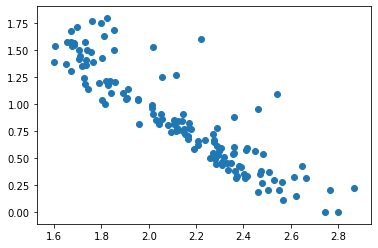

In [119]:
plt.scatter(T[0,:],T[1,:])

In [240]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [274]:
Y =TSNE(n_components=2).fit_transform(T.transpose())

vectors=pd.DataFrame(Y.T,columns=data_2.columns)

vectors = vectors.T
vectors.columns=['x','y']

In [273]:
T.shape

(10, 134)

In [294]:
user_profiles = pd.DataFrame(W,index=D.index)

In [300]:
user_profiles

,0,1,2,3,4,5,6,7,8,9
userId,,,,,,,,,,
1,0.877334,0.363536,0.322509,1.196960,0.352171,0.370175,0.369387,0.438503,0.239294,0.227874
4,0.830063,0.379805,0.308499,0.596125,0.000000,0.239584,0.570224,0.352373,0.111534,0.675647
5,0.787499,0.715194,0.262508,0.170694,0.147514,0.392880,0.244682,0.404649,0.411629,0.364106
6,0.975594,1.434857,0.069520,0.024519,0.149816,0.397348,0.174451,0.123112,0.159609,0.198785
7,0.573765,0.572536,0.775757,0.497496,0.172597,0.465479,0.419495,0.331794,0.122958,0.656152
...,...,...,...,...,...,...,...,...,...,...
606,0.789832,0.063198,0.821410,0.520218,0.382623,0.475930,0.694910,0.155275,0.819739,0.228238
607,0.681042,0.937516,0.161039,0.494598,0.605020,0.428175,0.324522,0.000000,0.221641,0.402955
608,0.827877,0.021655,0.933177,0.440703,0.737975,0.179827,0.299009,0.121857,0.676097,0.419744


In [278]:
profiles = pd.DataFrame(T,columns=data_2.columns).T
profiles = profiles.merge(movies,how='left',left_index=True,right_index=True)

In [276]:
vectors = vectors.merge(movies,how='left',left_index=True,right_index=True)

In [290]:
movie_profiles = profiles[['title','genres',0,1,2,3,4,5,6,7,8,9]]

In [291]:
movie_profiles

,title,genres,0,1,2,3,4,5,6,7,8,9
movieId,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.751924,1.080023,0.387142,0.470568,0.397546,1.166466,0.265930,1.512675,0.558689,1.955895
2,Jumanji (1995),Adventure|Children|Fantasy,1.659422,1.121046,0.611802,0.209755,0.055580,0.838189,0.537881,0.402098,0.048942,0.417090
6,Heat (1995),Action|Crime|Thriller,1.259503,1.050895,0.443391,0.484972,1.331833,0.081771,0.777694,0.783291,0.602929,0.274046
10,GoldenEye (1995),Action|Adventure|Thriller,1.980185,1.037467,0.694206,0.636106,0.229342,0.000000,0.254271,0.181509,0.137852,0.276541
32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1.221705,0.822625,0.249280,0.731808,0.716238,0.323405,0.486901,1.234215,1.615041,0.342277
...,...,...,...,...,...,...,...,...,...,...,...,...
48516,"Departed, The (2006)",Crime|Drama|Thriller,1.816869,0.207625,0.846338,0.176020,1.557064,0.623623,0.073365,0.859825,0.365583,0.228654
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,1.894903,0.350314,1.376298,0.283280,1.140892,0.590659,0.000000,0.702430,0.122968,0.000000
60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,1.668721,0.438219,1.137242,0.435837,0.386938,1.039880,0.426712,0.248435,0.326518,0.103007


In [265]:
vectors['adventure']=vectors['genres'].apply(lambda x: 'black' if int(x.find('Children')>=0) else 'yellow')

In [266]:
vectors

,x,y,title,genres,adventure
movieId,,,,,
1,-6.684491,8.934440,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,black
2,-4.444485,1.566356,Jumanji (1995),Adventure|Children|Fantasy,black
6,4.661454,-1.136899,Heat (1995),Action|Crime|Thriller,yellow
10,-3.205171,4.011917,GoldenEye (1995),Action|Adventure|Thriller,yellow
32,4.128324,1.085104,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,yellow
...,...,...,...,...,...
48516,2.040587,-0.986996,"Departed, The (2006)",Crime|Drama|Thriller,yellow
58559,1.455995,-0.538801,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,yellow
60069,-1.595094,-0.007663,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,black


In [267]:
import bokeh
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.io import show,output_notebook
output_notebook()

Loading BokehJS ... 
 
 Warning: Requesting CDN BokehJS version '1.4.0' from Bokeh development version '1.4.0-1-gd7eea5bf5'. This configuration is unsupported and may not work!

In [268]:
vectors

,x,y,title,genres,adventure
movieId,,,,,
1,-6.684491,8.934440,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,black
2,-4.444485,1.566356,Jumanji (1995),Adventure|Children|Fantasy,black
6,4.661454,-1.136899,Heat (1995),Action|Crime|Thriller,yellow
10,-3.205171,4.011917,GoldenEye (1995),Action|Adventure|Thriller,yellow
32,4.128324,1.085104,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,yellow
...,...,...,...,...,...
48516,2.040587,-0.986996,"Departed, The (2006)",Crime|Drama|Thriller,yellow
58559,1.455995,-0.538801,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,yellow
60069,-1.595094,-0.007663,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,black


In [269]:
f = figure(tooltips=[("name","@title"),("genres","@genres")])
source = ColumnDataSource(vectors)
f.circle(x='x',y='y',fill_color='adventure',source=source)

GlyphRenderer(id='3261', ...)

In [270]:
show(f)

In [301]:
U = TSNE(n_components=2).fit_transform(user_profiles.values)

In [304]:
user_profiles['x']=U[:,0]
user_profiles['y']=U[:,1]

In [306]:
user_profiles

,0,1,2,3,4,5,6,7,8,9,x,y
userId,,,,,,,,,,,,
1,0.877334,0.363536,0.322509,1.196960,0.352171,0.370175,0.369387,0.438503,0.239294,0.227874,2.199939,-13.950776
4,0.830063,0.379805,0.308499,0.596125,0.000000,0.239584,0.570224,0.352373,0.111534,0.675647,-1.880919,-10.640064
5,0.787499,0.715194,0.262508,0.170694,0.147514,0.392880,0.244682,0.404649,0.411629,0.364106,-4.529415,9.862566
6,0.975594,1.434857,0.069520,0.024519,0.149816,0.397348,0.174451,0.123112,0.159609,0.198785,-14.649135,16.222549
7,0.573765,0.572536,0.775757,0.497496,0.172597,0.465479,0.419495,0.331794,0.122958,0.656152,7.555180,-15.396638
...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.789832,0.063198,0.821410,0.520218,0.382623,0.475930,0.694910,0.155275,0.819739,0.228238,14.673217,-3.184718
607,0.681042,0.937516,0.161039,0.494598,0.605020,0.428175,0.324522,0.000000,0.221641,0.402955,-13.030830,9.482047
608,0.827877,0.021655,0.933177,0.440703,0.737975,0.179827,0.299009,0.121857,0.676097,0.419744,12.869136,-2.862457


In [312]:
vectors

,x,y,title,genres
movieId,,,,
1,-8.070770,-1.511650,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,-3.290282,3.146672,Jumanji (1995),Adventure|Children|Fantasy
6,5.846662,-0.556789,Heat (1995),Action|Crime|Thriller
10,-3.082168,0.053886,GoldenEye (1995),Action|Adventure|Thriller
32,4.191226,-1.640671,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...,...
48516,4.647598,2.793649,"Departed, The (2006)",Crime|Drama|Thriller
58559,3.810228,2.883957,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
60069,0.471063,4.466138,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi


In [313]:
user_profiles.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'x', 'y'], dtype='object')

In [314]:
f = figure()
source = ColumnDataSource(user_profiles[['x','y']])
f.circle(x='x',y='y',source=source)

GlyphRenderer(id='3580', ...)

In [315]:
show(f)